Original DNA:  ATGGCGTAGTGA
Mutate DNA:  ATGGCGTGGTGA
Original mRNA:  AUGGCGUAGUGA
Mutated mRNA:  AUGGCGUGGUGA

Protein Original:  ['Met', 'Ala', 'Stop', 'Stop']
Protein Mutated:  ['Met', 'Ala', 'unknown', 'Stop']

Motifs (k=5):  ['ATGGC', 'TGGCG', 'GGCGT', 'GCGTA', 'CGTAG', 'GTAGT', 'TAGTG', 'AGTGA']

Motif Frequency Table: 
    Motif  Frequency
0  AGTGA          1
1  ATGGC          1
2  CGTAG          1
3  GCGTA          1
4  GGCGT          1
5  GTAGT          1
6  TAGTG          1
7  TGGCG          1

Top 5 Motifs:     Motif  Frequency
0  AGTGA          1
1  ATGGC          1
2  CGTAG          1
3  GCGTA          1
4  GGCGT          1


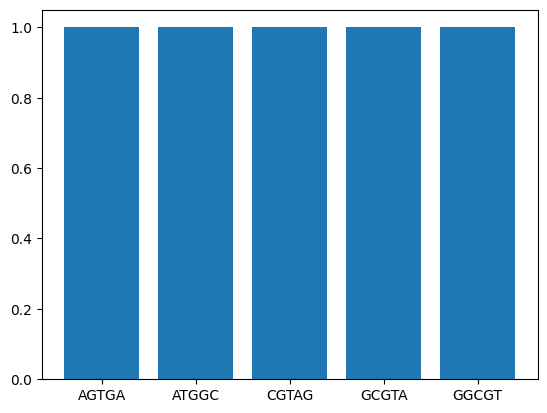

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dna = 'ATGGCGTAGTGA'

print("Original DNA: ", dna)

def mutate(seq):
    seq = list(seq)
    if seq[7] == 'A':
        seq[7] = 'G'
    return "".join(seq)

mutated_dna = mutate(dna)
print("Mutate DNA: ", mutated_dna)

def transcribe(seq):
    return seq.replace("T", "U")

mrna_original = transcribe(dna)
mrna_mutated = transcribe(mutated_dna)

print("Original mRNA: ", mrna_original)
print("Mutated mRNA: ", mrna_mutated)

codon_table = {
    'AUG':'Met','GCG':'Ala','UAG':'Stop','UGA':'Stop','GUA':'Val',
    'CGU':'Arg','AGU':'Ser','GGA':'Gly','GCU':'Ala','GUG':'Val'    
}    

def translate(mrna):
    protein = []
    for i in range(0, len(mrna), 3):
        codon = mrna[i:i+3]
        protein.append(codon_table.get(codon, "unknown"))
    return protein

protein_original = translate(mrna_original)
protein_mutated = translate(mrna_mutated)

print("\nProtein Original: ", protein_original)
print("Protein Mutated: ", protein_mutated)

k = 5
def find_motif(seq, k):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

motifs = find_motif(dna, k)
print("\nMotifs (k=5): ", motifs)

df = pd.DataFrame(motifs, columns=['Motif'])
freq_df = df.value_counts().reset_index()
freq_df.columns = ['Motif', 'Frequency']
print("\nMotif Frequency Table: \n", freq_df)

top5 = freq_df.head(5)
print("\nTop 5 Motifs: ", top5)

plt.bar(top5['Motif'], top5['Frequency'])
plt.show()

In [14]:
def find_identity(dna, mutated_dna):
    matches = sum(1 for a,b in zip(dna, mutated_dna) if a==b)
    total = len(dna)
    identity = (matches/total)*100
    return identity

identity = find_identity(dna, mutated_dna)
print(identity)

def find_similarity(protein_original, protein_mutated):
    matches = sum(1 for a,b in zip(protein_original, protein_mutated) if a==b)
    total = len(protein_original)
    similarity = (matches/total)*100
    return similarity

similarity = find_similarity(protein_original, protein_mutated)
print(similarity)

remove = set(range(2,5)) | set(range(6-8))
modify = [dna[i] for i in range(len(dna)) if not i in remove]
print(modify)

91.66666666666666
75.0
['A', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'A']
